In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import utils

In [16]:
# clone repo https://github.com/amazon-science/esci-data
# previously install git-lfs to download the data files when cloning

ESCI_DATASET_ROOT = '/usr/local/google/home/raulramos/projects/esci-data'

In [3]:
# load ground truth
dgt = utils.load_examples(ESCI_DATASET_ROOT=ESCI_DATASET_ROOT, locale='es')

## baseline model results for locale `es`

In [9]:
br = utils.get_model_ranking('baseline/baseline_model_ranking_es.csv', dgt)
br.shape

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2417/2417 [00:01<00:00, 1554.13it/s]


(65883, 16)

In [11]:
print(f'number of queries: {len(np.unique(br.query_id))}')

number of queries: 2417


In [12]:
df_dcg, ndgc = utils.compute_ndcg(br)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2417/2417 [00:06<00:00, 395.13it/s]


In [13]:
print (f'mean ndgc {ndgc.ndgc.mean():.4f}')
ndgc

mean ndgc 0.9366


,dgc,idgc,ndgc
query_id,,,
130,22.656300,24.134892,0.938736
155,22.384418,26.403269,0.847790
210,11.073592,12.842761,0.862244
232,43.294247,47.013772,0.920884
237,40.871471,45.916756,0.890121
...,...,...,...
115524,33.976125,34.826221,0.975590
115630,40.114274,41.537207,0.965743
115639,38.092416,41.879527,0.909571


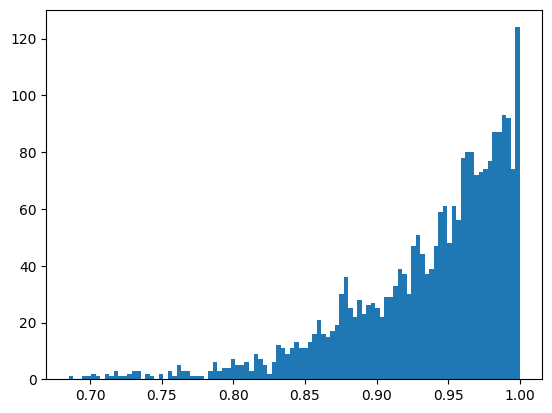

In [14]:
import matplotlib.pyplot as plt
plt.hist(ndgc.ndgc, bins=100);

In [15]:
# inspect random query

#qid = np.random.choice(np.unique(df_dcg.query_id.values))
qid = np.random.choice(ndgc[ndgc.ndgc<.85].index)
print (ndgc.loc[qid])
bq = df_dcg[df_dcg.query_id==qid]
bq[['query_id', 'query', 'product_id', 'relevance', 'model_rank', 'ideal_rank', 'dgc', 'idgc','product_title']]

dgc     33.404481
idgc    39.593317
ndgc     0.843690
Name: 66332, dtype: float64


,query_id,query,product_id,relevance,model_rank,ideal_rank,dgc,idgc,product_title
0,66332,material mesa de luz montessori,B071HDDCYD,4,1,1,5.770780,5.770780,R-Crea - Mesas de luz Montessori con Certifica...
1,66332,material mesa de luz montessori,B087TNBKFG,1,2,21,0.910239,0.323515,"Guiseapue Mesa de Luz para Calcar, LED Tableta..."
2,66332,material mesa de luz montessori,B08QHM6NHR,1,3,23,0.721348,0.314658,Juegos Montessori para Niños Juego de Memoria ...
3,66332,material mesa de luz montessori,B095WTBBVB,1,4,22,0.621335,0.318929,"Fabu 136 Pcs Juego de Cuentas de Madera, Jugue..."
4,66332,material mesa de luz montessori,B07WCNSKC9,1,5,25,0.558111,0.306928,"Beetest ES Juguetes de Madera NiñOs, Motricida..."
5,66332,material mesa de luz montessori,B093S4YQCD,2,6,20,1.027797,0.656917,"RIKONDA Juegos de Madera para pequeños, para n..."
6,66332,material mesa de luz montessori,B091CP7GYK,1,7,24,0.480898,0.310667,"GOLDGE 6 en 1 Montessori Juguete Educativo, Ju..."
7,66332,material mesa de luz montessori,B0872M7YKQ,1,8,29,0.455120,0.294014,"Juguetes Bebes 1 Año, Felly Rompecabezas Juego..."
8,66332,material mesa de luz montessori,B0991K88TW,3,9,13,1.302883,1.136770,Japace Juguetes Montessori Apilables Educativo...
9,66332,material mesa de luz montessori,B07R4RQQ9K,3,10,10,1.251097,1.251097,BOHS Bloques Sensoriales Arcoíris (24 Piezas) ...
